In [1]:
from preprocessors.oepreprocessor import OEPreprocessor as oepp
import os
participant_id = "P07"
parentdir = "data"
path = os.path.join(parentdir, participant_id)

OELpath = os.path.join(path, "P07L.oe")
OERpath = os.path.join(path, "P07R.oe")

In [2]:
oedataL = oepp(OELpath).load()
oedataR = oepp(OERpath).load()

📂 File: P07L.oe, Version: 1, Timestamp: 1971-11-02 14:49:05
❌ Could not parse SID 0 at timestamp 10853382.371877
📂 File: P07R.oe, Version: 1, Timestamp: 1970-11-07 19:59:46


In [3]:
oedataLacc = oedataL["imu"]["acc"].reset_index()
oedataRacc = oedataR["imu"]["acc"].reset_index()

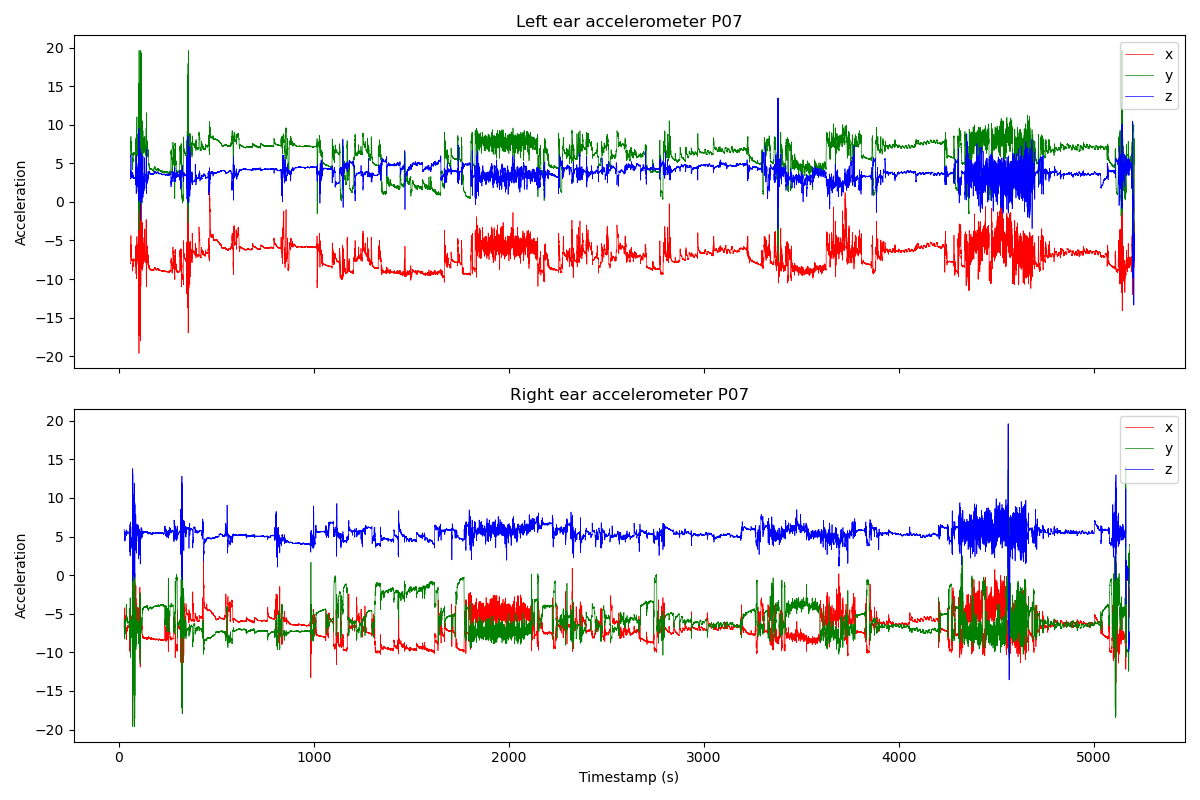

Left ear IMU: acc=257242, gyro=257242
Right ear IMU: acc=257540, gyro=257540


In [4]:
# pip install ipympl for interactive matplotlib in a python notebook

%matplotlib widget
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
axes = axes.ravel()

for col, color in zip(['x', 'y', 'z'], ['r', 'g', 'b']):
    axes[0].plot(oedataLacc['timestamp'], oedataLacc[col], color=color, label=col, linewidth=0.5)
axes[0].set_title(f'Left ear accelerometer {participant_id}')
axes[0].set_ylabel('Acceleration')
axes[0].legend(loc='upper right')

for col, color in zip(['x', 'y', 'z'], ['r', 'g', 'b']):
    axes[1].plot(oedataRacc['timestamp'], oedataRacc[col], color=color, label=col, linewidth=0.5)
axes[1].set_title(f'Right ear accelerometer {participant_id}')
axes[1].set_xlabel('Timestamp (s)')
axes[1].set_ylabel('Acceleration')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

print(f"Left ear IMU: acc={len(oedataL['imu']['acc'])}, gyro={len(oedataL['imu']['gyro'])}")
print(f"Right ear IMU: acc={len(oedataR['imu']['acc'])}, gyro={len(oedataR['imu']['gyro'])}")

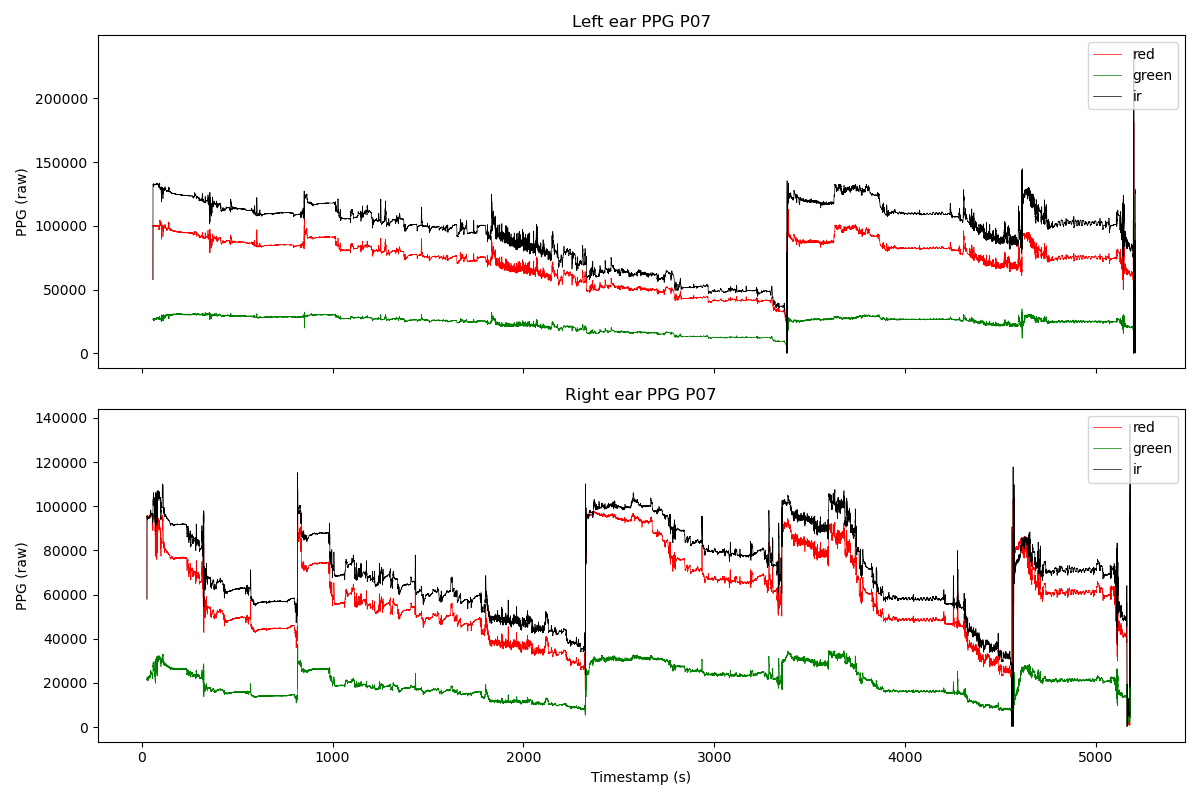

Left ear PPG: red=433128, green=433128, ir=433128
Right ear PPG: red=433642, green=433642, ir=433642


In [5]:
# plot PPG (red, green, ir) for left and right ears
ppg_fig, ppg_axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ppg_axes = ppg_axes.ravel()

for label, color in zip(['red', 'green', 'ir'], ['r', 'g', 'k']):
    s = oedataL['ppg'][label]
    ppg_axes[0].plot(s.index, s.values, color=color, label=label, linewidth=0.5)
ppg_axes[0].set_title(f'Left ear PPG {participant_id}')
ppg_axes[0].set_ylabel('PPG (raw)')
ppg_axes[0].legend(loc='upper right')

for label, color in zip(['red', 'green', 'ir'], ['r', 'g', 'k']):
    s = oedataR['ppg'][label]
    ppg_axes[1].plot(s.index, s.values, color=color, label=label, linewidth=0.5)
ppg_axes[1].set_title(f'Right ear PPG {participant_id}')
ppg_axes[1].set_xlabel('Timestamp (s)')
ppg_axes[1].set_ylabel('PPG (raw)')
ppg_axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

print(f"Left ear PPG: red={len(oedataL['ppg']['red'])}, green={len(oedataL['ppg']['green'])}, ir={len(oedataL['ppg']['ir'])}")
print(f"Right ear PPG: red={len(oedataR['ppg']['red'])}, green={len(oedataR['ppg']['green'])}, ir={len(oedataR['ppg']['ir'])}")

In [19]:
#baro
#bone conduction

# no need to plot I dont think, lets just inspect the lengths
# will need to update the OEpreprocessor though to access these. 

print(f"Left ear barometer: pressure={len(oedataL['barometer']['pressure'])}, temperature={len(oedataL['barometer']['temperature'])}")
print(f"Right ear barometer: pressure={len(oedataR['barometer']['pressure'])}, temperature={len(oedataR['barometer']['temperature'])}")

# access bone conduction channels via attribute-style access and print lengths
left_x = oedataL['bone_acc'].x
left_y = oedataL['bone_acc'].y
left_z = oedataL['bone_acc'].z

right_x = oedataR['bone_acc'].x
right_y = oedataR['bone_acc'].y
right_z = oedataR['bone_acc'].z

print(f"Left ear bone conduction samples: x={len(left_x)}, y={len(left_y)}, z={len(left_z)}")
print(f"Right ear bone conduction samples: x={len(right_x)}, y={len(right_y)}, z={len(right_z)}")

Left ear barometer: pressure=0, temperature=0
Right ear barometer: pressure=32222, temperature=32222
Left ear bone conduction samples: x=0, y=0, z=0
Right ear bone conduction samples: x=258670, y=258670, z=258670
